<a href="https://colab.research.google.com/github/Granero0011/DS-Unit-2-Sprint-2-Regression/blob/master/regression_diagnostics_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv")

In [81]:
# Most homes weren't renovated
df['yr_renovated'].value_counts().head()

0       20699
2014       91
2013       37
2003       36
2000       35
Name: yr_renovated, dtype: int64

In [0]:
# Drop columns that I don't care about
df = df.drop(columns=['id','date','zipcode','lat','long','yr_renovated'])

In [83]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [84]:
df.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15']

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
#I picked sqft of living and Price

In [86]:
df['sqft_living'].head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [87]:
df['sqft_living'].isnull().sum()

0

In [88]:
df['price'].isnull().sum()

0

In [0]:
X= df['sqft_living']
y= df['price']

In [90]:
# Use Statsmodels to run a regression
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:55:49   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


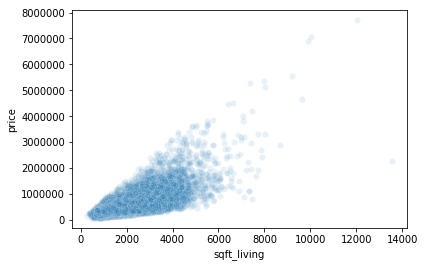

In [91]:
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.1)
plt.show()

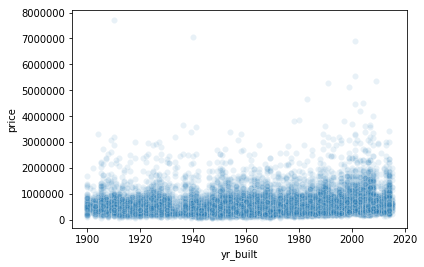

In [92]:
sns.scatterplot(x='yr_built', y='price', data=df, alpha=0.1)
plt.show()

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [93]:
print(df.shape)
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)


(21613, 15)
(19628, 15)


In [94]:
X=df['sqft_living']
y=df['price']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:            -2.6575e+05
No. Observations:               19628   AIC:                         5.315e+05
Df Residuals:                   19626   BIC:                         5.315e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.843e+04   3701.811     26.590      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
df['ln_price'] = np.log(df['price'])

In [96]:

y = df['ln_price']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                 1.211e+04
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:55:50   Log-Likelihood:                -8016.0
No. Observations:               19628   AIC:                         1.604e+04
Df Residuals:                   19626   BIC:                         1.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2278      0.007   1665.779      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 
            'sqft_living15', 'sqft_lot15']

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          7.980614
sqft_living    1.000000
dtype: float64

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [112]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,ln_price
price,1.000000,0.304087,0.450983,0.622494,0.090318,0.278463,NaN,0.192860,0.041073,0.633286,0.528173,0.224491,0.038711,0.542628,0.080772,0.953864
bedrooms,0.304087,1.000000,0.493379,0.608228,0.103306,0.166501,NaN,0.040712,0.022108,0.333969,0.485218,0.275338,0.167137,0.399157,0.101834,0.310882
bathrooms,0.450983,0.493379,1.000000,0.712664,0.057161,0.517027,NaN,0.074900,-0.143999,0.617101,0.631119,0.209021,0.547884,0.529641,0.059927,0.469904
sqft_living,0.622494,0.608228,0.712664,1.000000,0.220521,0.361725,NaN,0.131191,-0.074589,0.706916,0.856115,0.346771,0.347315,0.738594,0.221175,0.617664
sqft_lot,0.090318,0.103306,0.057161,0.220521,1.000000,-0.098440,NaN,0.026474,0.039000,0.131567,0.209609,0.038688,0.030672,0.259295,0.817261,0.088962
floors,0.278463,0.166501,0.517027,0.361725,-0.098440,1.000000,NaN,-0.008950,-0.279074,0.472125,0.540394,-0.293306,0.507556,0.279395,-0.102452,0.298237
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.192860,0.040712,0.074900,0.131191,0.026474,-0.008950,NaN,1.000000,0.029044,0.111648,0.050666,0.157383,-0.065941,0.144636,0.018006,0.179163
condition,0.041073,0.022108,-0.143999,-0.074589,0.039000,-0.279074,NaN,0.029044,1.000000,-0.177021,-0.179416,0.183872,-0.369451,-0.112920,0.046611,0.034245
grade,0.633286,0.333969,0.617101,0.706916,0.131567,0.472125,NaN,0.111648,-0.177021,1.000000,0.710706,0.053650,0.478221,0.670352,0.146998,0.633236


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [0]:
##### Your Code Here #####

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [0]:
##### Your Code Here #####

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
##### Your Code Here #####

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [0]:
##### Your Code Here #####

# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.